### Motivating Experiment


### Evaluation 1

In [1]:
import pandas as pd
from cProfile import label
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


def exp1_plot_throughput(csv_file, ylim, optimal):
    df = pd.read_csv(csv_file)
    df.rename(columns=str.strip, inplace=True)

    plt.figure(figsize=(6, 4))
    plt.xlabel('Episode')
    plt.ylabel('Effective Throughput (tps)')
    plt.ylim(0, ylim)
    plt.plot(range(1, len(df) + 1), df['throughput'], label='Learned')
    plt.grid(True)
    plt.axhline(y=optimal, color="red", linestyle="--", label="Optimal")
    plt.legend(frameon=False)


##### Workload A: XOV+reorder
```json 
{
   "write_ratio": 0.2,
   "hot_key_ratio": 0.95,
   "num_keys": 10000,
   "num_hot_keys": 5,
   "trans_per_interval": 300,
   "interval": 50000,
   "execution_delay": 5000
}
```

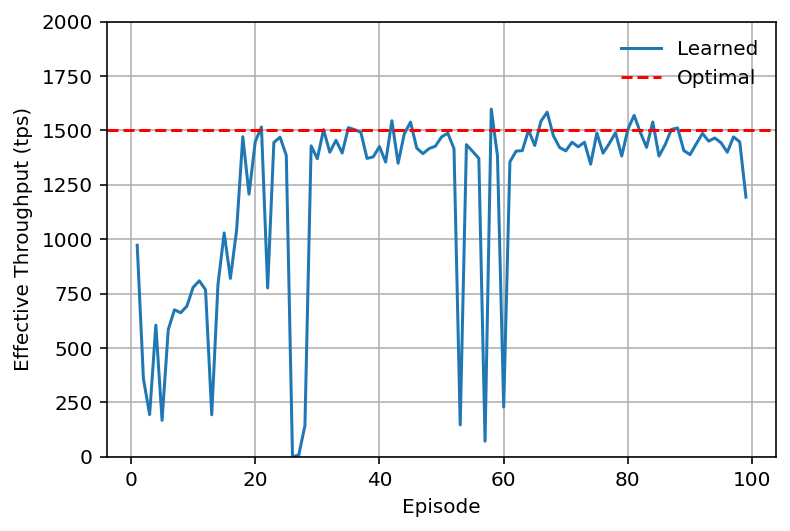

In [3]:
exp1_plot_throughput('ts_single_xov_reorder.csv', 2000, 1500)

##### Workload B: OXII
```json
{
   "write_ratio": 0.5,
   "hot_key_ratio": 0.99,
   "num_keys": 10000,
   "num_hot_keys": 10,
   "trans_per_interval": 100,
   "interval": 50000,
   "execution_delay": 1000
}
```

**Single Workload**

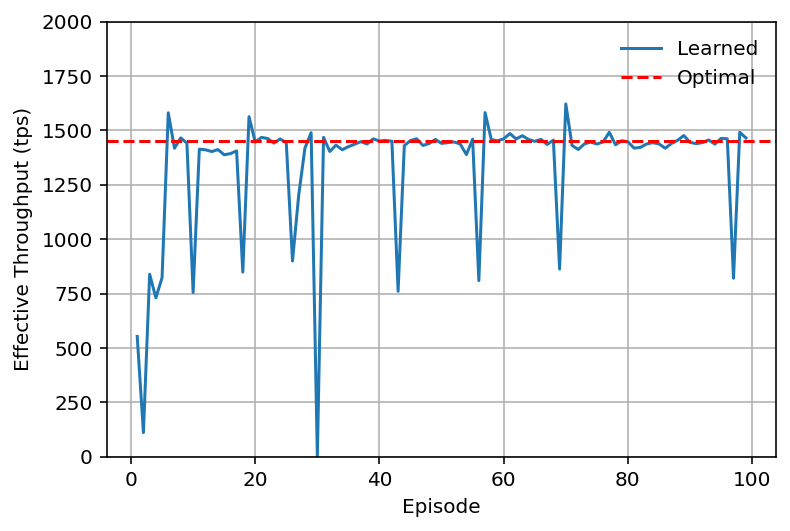

In [4]:
exp1_plot_throughput('ts_single_oxii.csv', 2000, 1450)

**Switching from Workload A**

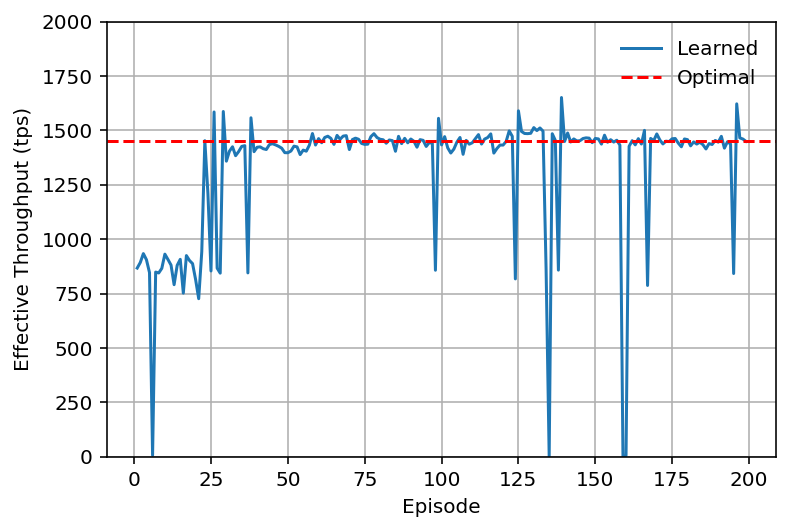

In [6]:
exp1_plot_throughput('ts_seed_oxii.csv', 2000, 1450)


##### Workload C: XOV
```json
{
   "write_ratio": 0.5,
   "hot_key_ratio": 0.1,
   "num_keys": 10000,
   "num_hot_keys": 10,
   "trans_per_interval": 300,
   "interval": 50000,
   "execution_delay": 10000
}
```

**Single Workload**

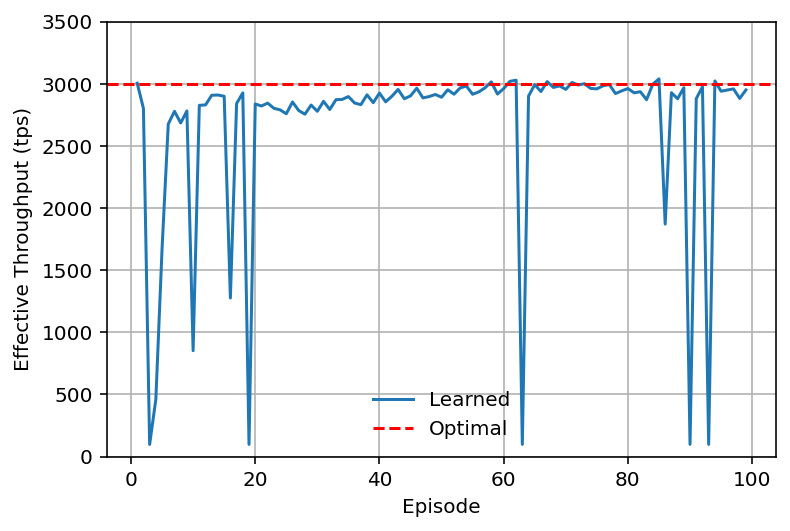

In [5]:
exp1_plot_throughput('ts_single_xov.csv', 3500, 3000)

**Switching from Workload B**

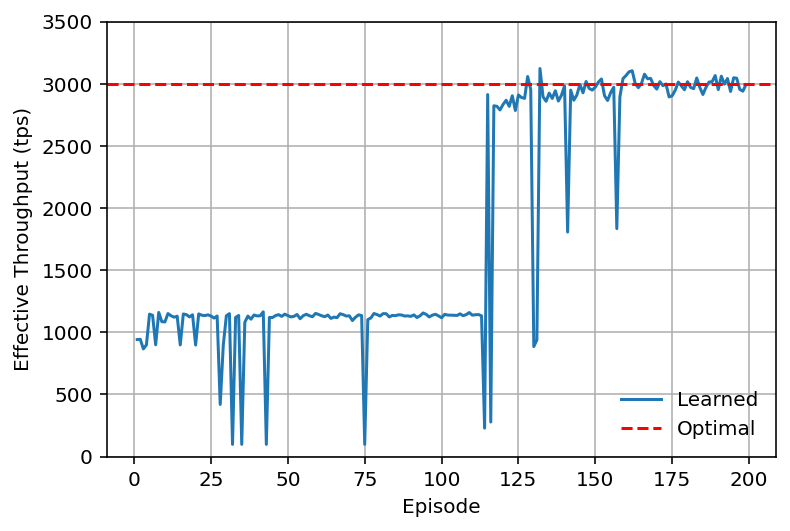

In [2]:
exp1_plot_throughput('ts_seed_xov.csv', 3500, 3000)

##### Workload D: OX / StreamChain
```json
{
   "write_ratio": 0.9,
   "hot_key_ratio": 0.95,
   "num_keys": 10000,
   "num_hot_keys": 1,
   "trans_per_interval": 100,
   "interval": 50000,
   "execution_delay": 0
}
```

**Single Workload**

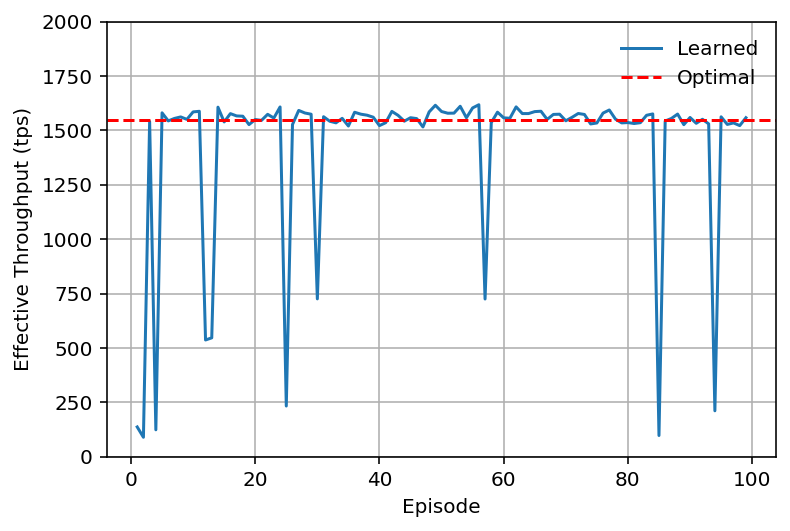

In [5]:
exp1_plot_throughput('ts_single_ox.csv', 2000, 1550)

**Switching from Workload C**

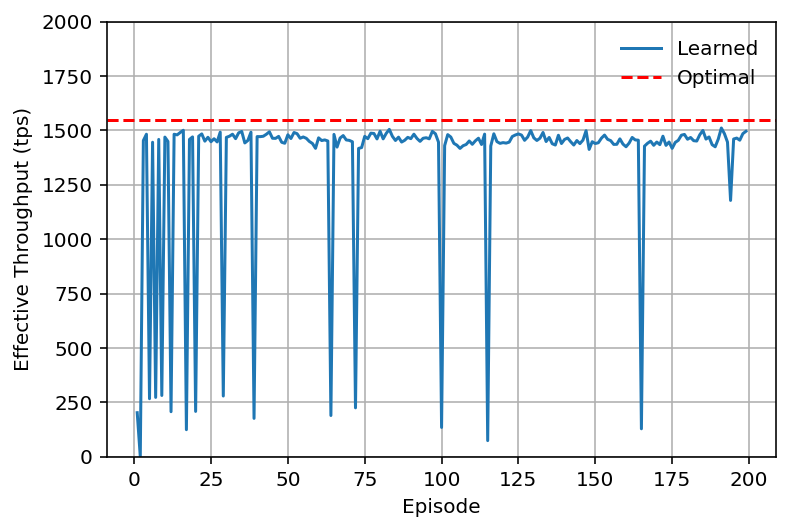

In [3]:
exp1_plot_throughput('ts_seed_ox.csv', 2000, 1550)

### Evaluation 2